<a href="https://colab.research.google.com/github/MithunSR/Time_series_tutorials/blob/main/Covid_19_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction to time series

Time series prediction is the prediction of future values based on observed values in the past. It can be defined as a supervised learning problem in that it requires finding patterns between observed data in the past and future values. Therefore, in this chapter, we will build a model that predicts future values through supervised learning based on a neural network structure.

Time series prediction is a skill that is required in many areas. One of the areas is in the energy domain. Electric power plants need to predict future power demand to secure sufficient amounts of reserved power, and city gas companies need a future usage prediction model to take preemptive measures against meter reader failure and meter reader cheating. In fact, these issues were presented for data science competitions (electric power, city gas) to facilitate the discovery of new models. In addition, stakeholders in the retail domain are interested in predicting the sales volumes of items for efficient product management, which was also the topic of a data science competition.(distribution)

In this tutorial, we will build a model that predicts future confirmed cases of COVID-19 based on data from the past confirmed cases using COVID-19 confirmed case data provided by Johns Hopkins University's Center for Systems Science and Engineering. In chapter 1, we will look at the neural network structures that can be used when building a time series prediction model, and check the metrics that can be used when evaluating model performance. In chapter 2, we will deepen our understanding of COVID-19 confirmed case data through exploratory data analysis, and in chapter 3 we will learn how to restructure time series data so it can be used for supervised learning. In chapters 4 and 5, we will use deep learning models to predict future confirmed cases.

##1.1 Available Deep Learning Architectures

###1.1.1 CNN

In general, CNN is a network structure that performs well in computer vision tasks. However, CNNs can also be applied to time series prediction. A weighted sum between input sequence data can be calculated using a one-dimensional convolution filter to calculate the predicted future value. However, the CNN structure does not take into account the temporal dependence between past and future data.

###1.1.2 RNN

RNN is a network structure that is frequently used in solving natural language processing tasks, and it utilizes hidden state information accumulated in previous states for future prediction. By doing so, it is possible to manipulate past information to calculate future forecasts. However, if the given input sequence is too large, a vanishing gradient problem may occur that adversely affects model training. Therefore, the LSTM structure, which solves the vanishing gradient problem, is used frequently. We will use the LSTM structure in this tutorial.

###1.1.3 Attention Mechanism

When predicting the future based on past information, there can be information from the past that is helpful and information that isn't. For example, if a retailer wants to predict weekend sales, it may be helpful to consider weekend sales from the previous week rather than sales on the weekdays leading up to the prediction period. By using the attention mechanism, it is possible to manipulate these factors into the model. It calculates the importance of past points in time and uses them to inference future values. More accurate prediction is possible by assigning more weight to the value that is directly influencing the point to be predicted.

##1.2 Evaluation Metric
In this tutorial, we are going to build a model for predicting confirmed cases of COVID-19. Since the confirmed cases are measured with continuous values, the performance of the model can be evaluated through the gaps between the predicted and actual values. In this section, we'll look at various ways to calculate the gaps between the predicted and actual values. We will first define some symbols before diving in.

> $y_i$: Actual values that need to be predicted <br> $\hat{y}_i$: Values predicted by the model <br> $n$: Size of the test dataset



###1.2.1 MAE (Mean Absolute Error)

> $MAE=\frac{1}{n}\displaystyle\sum_{i=1}^{n} |y_i-\hat{y}_i|$

MAE, also known as L1 Loss, can be calculated by dividing the sum of the absolute differences between the predicted values and the actual values by the number of samples(n). Since this is the process for calculating an average, from now on we will refer to this as 'calculating the mean'. Since the scale of MAE is the same scale as the target variable being predicted, the meaning of the value can be understood intuitively. The implemented code looks like this:

In [29]:
import numpy as np #import numpy package

def MAE(true, pred):
    '''
    true: np.array 
    pred: np.array
    '''
    return np.mean(np.abs(true-pred))

TRUE = np.array([10, 20, 30, 40, 50])
PRED = np.array([30, 40, 50, 60, 70])

MAE(TRUE, PRED)

20.0

###1.2.2 MSE (Mean Squared Error)

> $MSE=\frac{1}{n}\displaystyle\sum_{i=1}^{n} (y_i-\hat{y}_i)^2$

> $RMSE=\sqrt{\frac{1}{n}\displaystyle\sum_{i=1}^{n} (y_i-\hat{y}_i)^2}$

MSE, also known as L2 Loss, is calculated by taking the mean of the squared differences between the predicted values and the actual values. The more the predicted values deviate from the actual values, the more the MSE value will increase. It will increase exponentially. Since the calculated value is squared, the scale of the target variable and MSE is different. In order to match the scale of the target value, we need to calculate the square root of the MSE. This value is called RMSE. The implemented code for MSE looks like this:

In [30]:
def MSE(true, pred):
    '''
    true: np.array 
    pred: np.array
    '''
    return np.mean(np.square(true-pred))

TRUE = np.array([10, 20, 30, 40, 50])
PRED = np.array([30, 40, 50, 60, 70])

MSE(TRUE, PRED)

400.0

###1.2.3 MAPE (Mean Absolute Percentage Error)

> $MAPE=\frac{1}{n}\displaystyle\sum_{i=1}^{n} |\frac{y_i-\hat{y}_i}{y_i}|$

In order to calculate MAPE, first calculate the relative size of the error compared to the actual values by dividing the difference between each of the actual values and the predicted value by each actual value. Then, take the absolute value of the relative size of the error for each actual value and calculate the mean. Since the size of the error is expressed as a percentage value, it can be used to understand the performance of the model. Also, it is a suitable metric for evaluating a model when there is more than one target variable because the scale of the calculated errors across the target variables will be similar.

However, if there is an actual value of 0, MAPE will be undefined. In addition, even if the absolute values of the errors are same, more penalties are added to a predicted value that overestimates(Makridakis, 1993). Let's look at the example below.

In [31]:
def MAPE(true, pred):
    '''
    true: np.array 
    pred: np.array
    '''
    return np.mean(np.abs((true-pred)/true))

TRUE_UNDER = np.array([10, 20, 30, 40, 50])
PRED_OVER = np.array([30, 40, 50, 60, 70])
TRUE_OVER = np.array([30, 40, 50, 60, 70])
PRED_UNDER = np.array([10, 20, 30, 40, 50])


print('Comparison between MAE, MAPE when average error is 20 depending on the relationship between actual and predicted value \n')

print('When actual value is smaller than predicted value (Overestimating)')
print('MAE:', MAE(TRUE_UNDER, PRED_OVER))
print('MAPE:', MAPE(TRUE_UNDER, PRED_OVER))


print('\nWhen actual value is bigger than predicted value (Underestimating)')
print('MAE:', MAE(TRUE_OVER, PRED_UNDER))
print('MAPE:', MAPE(TRUE_OVER, PRED_UNDER))

Comparison between MAE, MAPE when average error is 20 depending on the relationship between actual and predicted value 

When actual value is smaller than predicted value (Overestimating)
MAE: 20.0
MAPE: 0.9133333333333333

When actual value is bigger than predicted value (Underestimating)
MAE: 20.0
MAPE: 0.4371428571428571


###1.2.4 SMAPE (Symmetric Mean Absolute Percentage Error)

> $SMAPE=\frac{100}{n}\displaystyle\sum_{i=1}^{n} \frac{|y_i-\hat{y}_i|}{|y_i| + |\hat{y}_i|}$


In [32]:
def SMAPE(true, pred):
    '''
    true: np.array 
    pred: np.array
    '''
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) #we won't include 100 in this code since it's a constant

print('Comparison between MAE, SMAPE when average error is 20 \n')

print('When actual value is smaller than predicted value (Overestimating)')
print('MAE:', MAE(TRUE_UNDER, PRED_OVER))
print('SMAPE:', SMAPE(TRUE_UNDER, PRED_OVER))


print('\nWhen actual value is bigger than predicted value (Underestimating)')
print('MAE:', MAE(TRUE_OVER, PRED_UNDER))
print('SMAPE:', SMAPE(TRUE_OVER, PRED_UNDER))

Comparison between MAE, SMAPE when average error is 20 

When actual value is smaller than predicted value (Overestimating)
MAE: 20.0
SMAPE: 0.29

When actual value is bigger than predicted value (Underestimating)
MAE: 20.0
SMAPE: 0.29


###1.2.5 RMSSE (Root Mean Squared Scaled Error)

> $RMSSE=\sqrt{\displaystyle\frac{\frac{1}{h}\sum_{i=n+1}^{n+h} (y_i-\hat{y}*i)^2}{\frac{1}{n-1}\sum*{i=2}^{n} (y_i-y_{i-1})^2}}$

We will proceed with the definition of the symbols used in the RMSSE formula. Each symbol has the following meaning.

> $y_i$: Actual value to be predicted
>
> $\hat{y}_i$: Value predicted by the model
>
> $n$: Size of the training dataset
>
> $h$: Size of the test dataset

RMSSE is a modified form of Mean Absolute Scaled Error ( [Hyndman, 2006](https://doi.org/10.1016/j.ijforecast.2006.03.001) ) and solves the problems of MAPE and SMAPE mentioned above. We have seen from above examples that MAPE and SMAPE result in an uneven overall error depending on the underestimation or overestimation of the model since they use the actual and predicted values of the test data to scale the MAE.

RMSSE avoids this problem by using the training data when scaling the MSE. It scales the error by dividing by the MSE that is calculated when applying naive forecasting on the training data, so the overall error is not affected by the underestimation or overestimation of the model. The naive forecast method is a method of forecasting from the most recent observation and is defined as follows:

> $\hat{y}*i = y*{i-1}$

This is a method of predicting the value at the time of $i$ as the actual value at the time of $i-1$. Since it is divided by the MSE value for the naive forecast method, if the RMSSE value is greater than 1, it means that the overall performance of the model is not better than the naive forecast method. On the other hand, if RMSSE is less than 1, it means that the performance of the model is better than the naive forecast method. Let's implement RMSSE with the code below. 

In [33]:
def RMSSE(true, pred, train): 
    '''
    true: np.array 
    pred: np.array
    train: np.array
    '''
    
    n = len(train)

    numerator = np.mean(np.sum(np.square(true - pred)))
    
    denominator = 1/(n-1)*np.sum(np.square((train[1:] - train[:-1])))
    
    msse = numerator/denominator
    

#2.EDA

##2.1 Download Datasets

In [34]:
!git clone https://github.com/Pseudo-Lab/Tutorial-Book-Utils

fatal: destination path 'Tutorial-Book-Utils' already exists and is not an empty directory.


In [35]:
!python Tutorial-Book-Utils/PL_data_loader.py --data COVIDTimeSeries

Downloading...
From: https://drive.google.com/uc?id=1B36Djko-f0LtVxSaBEVYosLTTsu0qtsh
To: /content/COVIDTimeSeries.zip
100% 3.18M/3.18M [00:00<00:00, 160MB/s]
COVIDTimeSeries.zip download complete!


In [36]:
!unzip -q COVIDTimeSeries.zip

replace covid_19_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

all = pd.read_csv('covid_19_data.csv')
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')

all contains daily confirmed cases, daily deaths, and daily recovered data. The dataframe of the dataset consists of ObservationDate, Province/State, Country/Region, Confirmed, Deaths, and Recovered.

In [63]:
all

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
172475,172476,12/06/2020,Zaporizhia Oblast,Ukraine,2020-12-07 05:26:14,36539.0,337.0,6556.0
172476,172477,12/06/2020,Zeeland,Netherlands,2020-12-07 05:26:14,6710.0,104.0,0.0
172477,172478,12/06/2020,Zhejiang,Mainland China,2020-12-07 05:26:14,1295.0,1.0,1288.0
172478,172479,12/06/2020,Zhytomyr Oblast,Ukraine,2020-12-07 05:26:14,31967.0,531.0,22263.0


confirmed is sequential data showing daily cases by country. Country/Region and Province/State are location data. Long and Lat are longitude and latitude, respectively. MM/DD/YYYY column records daily confirmed cases. The dataframe looks like below.

In [64]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,47851,48053,48116,48229,48527,48718,48952,49161,49378,49621
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,45188,46061,46863,47742,48530,49191,50000,50637,51424,52004
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,90014,90579,91121,91638,92102,92597,93065,93507,93933,94371
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7162,7190,7236,7288,7338,7382,7382,7446,7466,7519
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,15804,15925,16061,16161,16188,16277,16362,16407,16484,16562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1381,1385,1391,1395,1397,1402,1405,1405,1407,1410
267,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,102992,104879,106622,108099,109738,111102,113409,115606,117755,119612
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2079,2081,2082,2083,2083,2084,2085,2085,2087,2087
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,18062,18091,18161,18217,18274,18322,18428,18456,18504,18575


##2.2 EDA of World Data

Let's visualize the global COVID-19 daily cases using all. As mentioned above, there are two location data: Province/State and Country/Region. We will add the daily cases of every country based on Country/Region.[link text](https://)

In [65]:
group = all.groupby(['ObservationDate', 'Country/Region'])['Confirmed'].sum()
group = group.reset_index()
group.head()

,ObservationDate,Country/Region,Confirmed
0,01/22/2020,Hong Kong,0.0
1,01/22/2020,Japan,2.0
2,01/22/2020,Macau,1.0
3,01/22/2020,Mainland China,547.0
4,01/22/2020,South Korea,1.0


You can now see daily confirmed cases by country. Next, we will visualize world daily cases on the world map with animation effects. We can create the visualization with the plotly.express package.

In [66]:
import plotly as py
import plotly.express as px

With `px.choropleth`, we create the map layer, and then update dates through `.update_layout`.

Each parameter is as follows:

- location : name of the column which indicates location information in the dataframe

- locationmode : the range of countries (‘ISO-3’, ‘USA-states’, and ‘country names’)

- color : name of the column which has data to be expressed on the diagram

- animation_frame : name of the column for animation effects

Press the play button to see the COVID-19 daily case graphs.

In [67]:
choro_map=px.choropleth(group, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    animation_frame="ObservationDate"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

##2.3 EDA of South Korean Dataset

In [68]:
confirmed[confirmed['Country/Region']=='Korea, South']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20
157,NaN,"Korea, South",35.907757,127.766922,1,1,2,2,3,4,...,40098,40786,41736,42766,43484,44364,45442,46453,47515,48570


In [69]:
korea = confirmed[confirmed['Country/Region']=='Korea, South'].iloc[:,4:].T
korea.index = pd.to_datetime(korea.index)
korea

,157
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,3
...,...
2020-12-14,44364
2020-12-15,45442
2020-12-16,46453
2020-12-17,47515


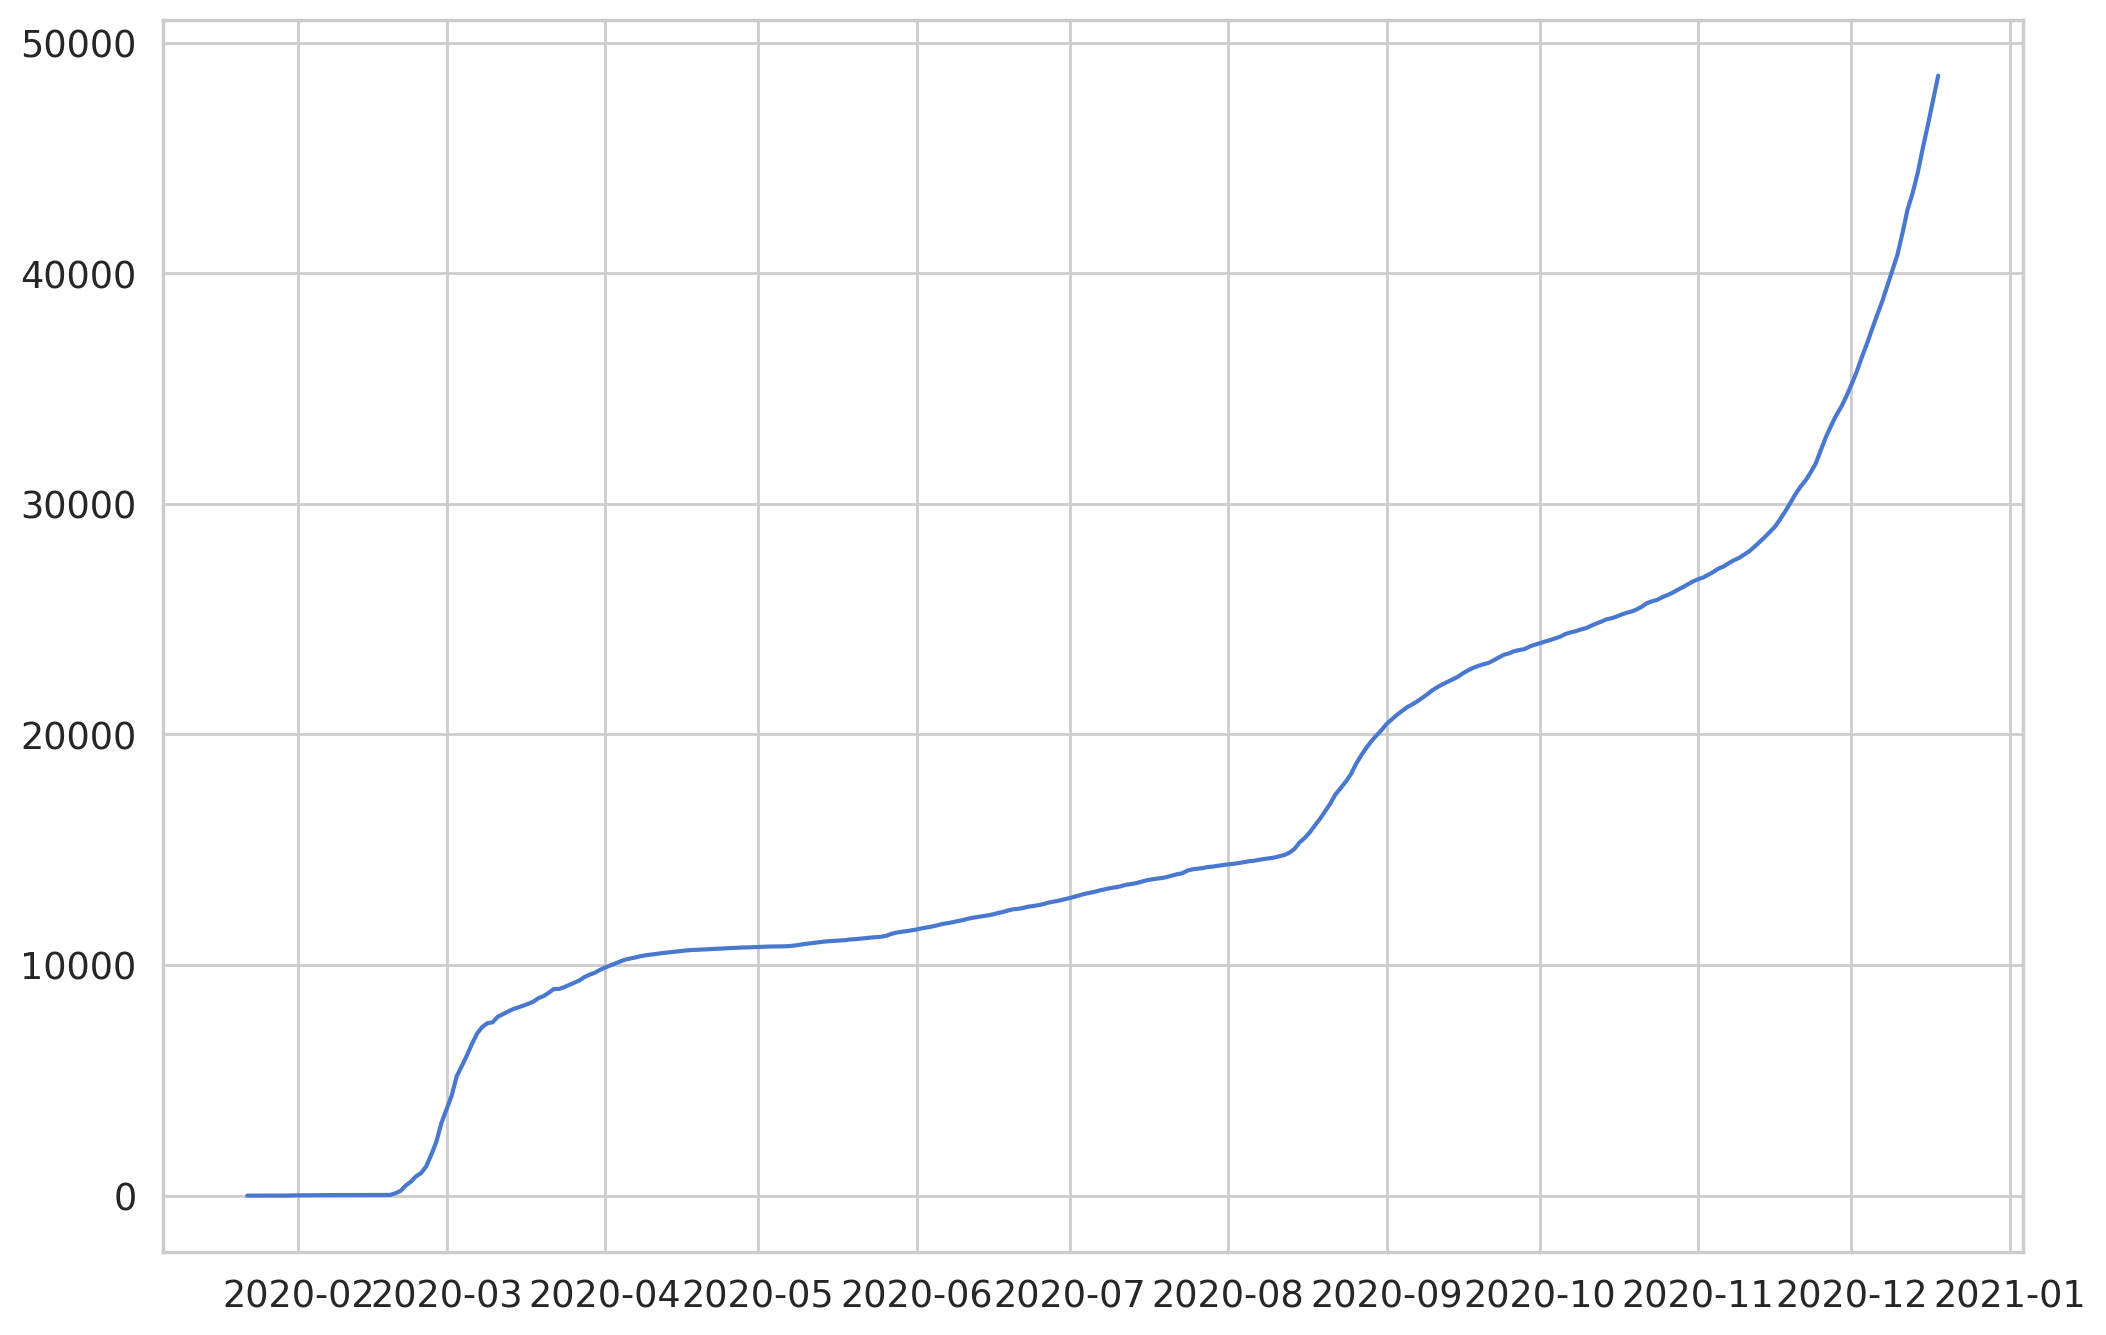

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

plt.plot(korea)
plt.show()

Now, let's look at daily cases instead of cumulative cases. Using the `diff` function, it is possible to tell the difference between each row, which makes it easier to transform cumulative data into daily data. However, there is a missing value in the first row of the cumulative data, which we need to fill. Also, we will change the data format to an integer (<code>int</code>).

In [71]:
daily_cases = korea.diff().fillna(korea.iloc[0]).astype('int')
daily_cases

,157
2020-01-22,1
2020-01-23,0
2020-01-24,1
2020-01-25,0
2020-01-26,1
...,...
2020-12-14,880
2020-12-15,1078
2020-12-16,1011
2020-12-17,1062


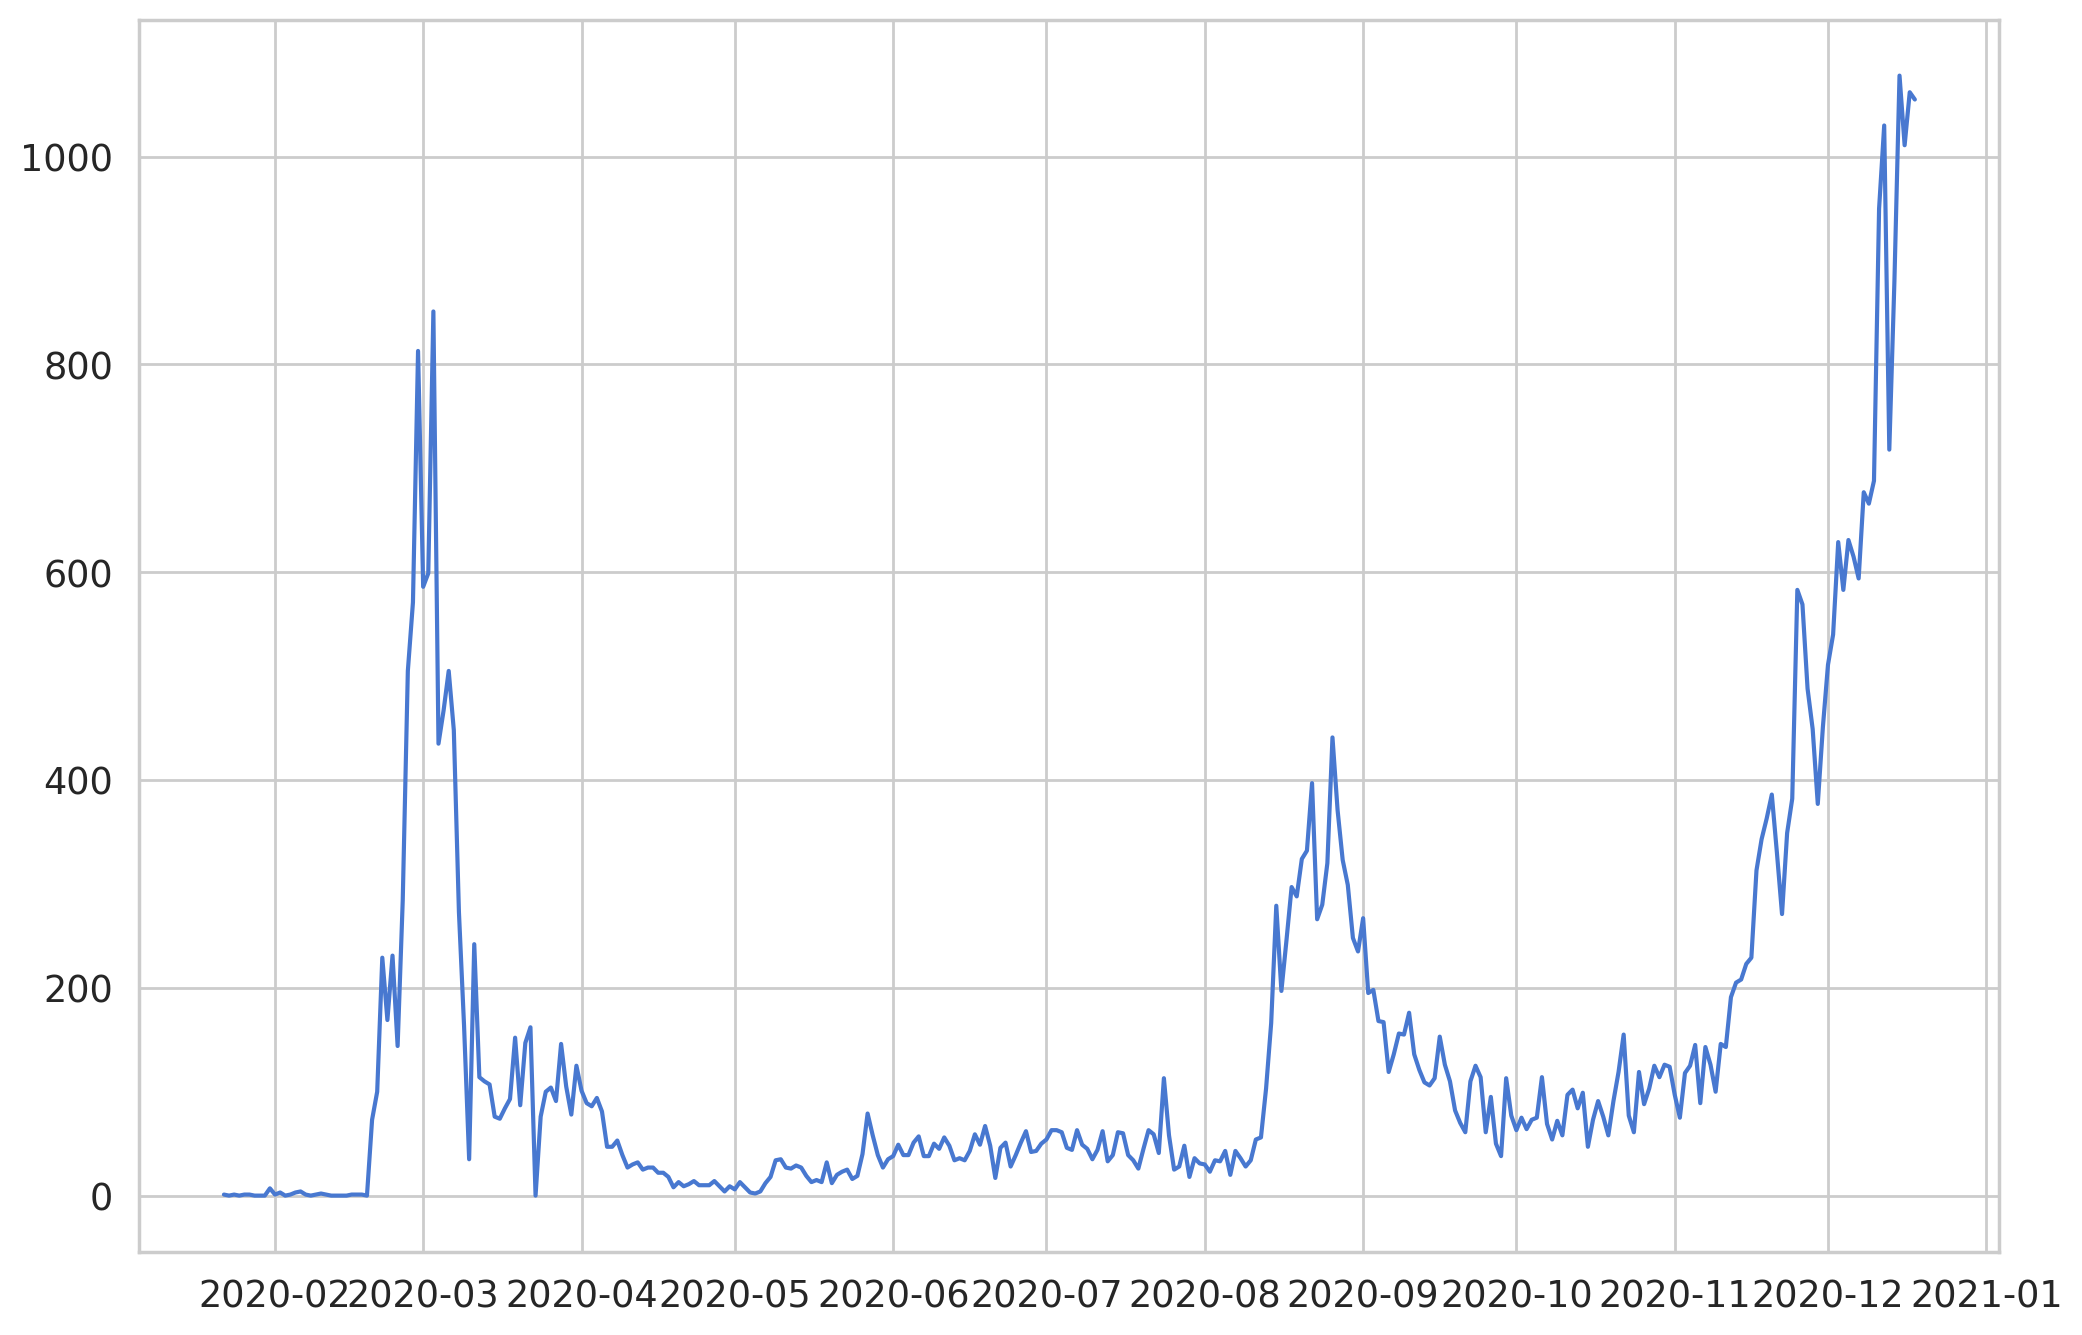

In [72]:
plt.plot(daily_cases)
plt.show()

#3.Data Pre-Processing

##3.1 Preparing Data for Supervised Learning

In [73]:
import pandas as pd
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
confirmed[confirmed['Country/Region']=='Korea, South']
korea = confirmed[confirmed['Country/Region']=='Korea, South'].iloc[:,4:].T
korea.index = pd.to_datetime(korea.index)
daily_cases = korea.diff().fillna(korea.iloc[0]).astype('int')
daily_cases

,157
2020-01-22,1
2020-01-23,0
2020-01-24,1
2020-01-25,0
2020-01-26,1
...,...
2020-12-14,880
2020-12-15,1078
2020-12-16,1011
2020-12-17,1062


We need to convert the time series data shown above into pairs of input and output variables to use them for supervised learning. In a time series task, we call this kind of data as sequential data. Firstly, we need to define the sequence length in order to transform the data into sequential data. The sequence length is decided by how many days from the data we wish to use to predict future cases. For example, for a sequence length of 5, data in  t−1 ,  t−2 ,  t−3 ,  t−4 , and  t−5  are used to predict data in time  t . Likewise, a task where we predict variable at time  t  using data from  t−k  to  t−1  is called an one-step prediction task.

In [74]:
import numpy as np

def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)]
        y = data.iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(daily_cases, seq_length)

In [75]:
X.shape, y.shape

((327, 5, 1), (327, 1))

We will divide the transformed dataset into training, validation, and test datasets with an 8:1:1 ratio. The total number of data is 327, so the division of each dataset results in the following: 261 data for training, 33 data for validation, and 33 data for testing.

In [76]:
train_size = int(327 * 0.8)
print(train_size)

261


In [77]:
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+33], y[train_size:train_size+33]
X_test, y_test = X[train_size+33:], y[train_size+33:]

In [78]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(261, 5, 1) (33, 5, 1) (33, 5, 1)
(261, 1) (33, 1) (33, 1)


##3.2 Data Scaling

In chapter 3.2, we will perform data scaling. More specifically, we will perform MinMax scaling, which transforms the data range to between 0 and 1. Apply the following mathematical notation for MinMax scaling after calculating the minimum and maximum values of the data group.

> $x_{scaled} = \displaystyle\frac{x - x_{min}}{x_{max} - x_{min}}$

The data scaling for the training, validation, and test datasets must be processed based on the statistics of the training data. Input variables from the testing dataset should not be used, so we must perform training dataset scaling using the statitistics of the training data.<br>Since the model was trained with the statistics of the training data, the test data must also be scaled based on the same values in order to evaluate model performance later. Similarly, the validation data require data scaling based on the statistics of the training data, since validation data need to go through the same process of pre-processing as the test data.

We will get the minimum and maximum values from the `X_train` data in order to apply MinMax scaling.

In [79]:
MIN = X_train.min()
MAX = X_train.max()
print(MIN, MAX)

0 851


In [80]:
def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

Let's perform scaling using the MinMaxScale function.

In [81]:
X_train = MinMaxScale(X_train, MIN, MAX)
y_train = MinMaxScale(y_train, MIN, MAX)
X_val = MinMaxScale(X_val, MIN, MAX)
y_val = MinMaxScale(y_val, MIN, MAX)
X_test = MinMaxScale(X_test, MIN, MAX)
y_test = MinMaxScale(y_test, MIN, MAX)

Next, we will transform the data type from np.array into torch.Tensor in order for the data to be input in a PyTorch model. First, we will define the function for transforming the data type.

In [82]:
import torch

def make_Tensor(array):
    return torch.from_numpy(array).float()

We will perform the transformation through the make_Tensor function.

In [83]:
X_train = make_Tensor(X_train)
y_train = make_Tensor(y_train)
X_val = make_Tensor(X_val)
y_val = make_Tensor(y_val)
X_test = make_Tensor(X_test)
y_test = make_Tensor(y_test)

So far, we have practiced transforming data into the correct format for the supervised learning of time series and data scaling. In the next chapter, we will build a prediction model for COVID-19 cases with the data we curated.

#4.LSTM Model

Firstly, import the basic modules we will need to use.

Through `%matplotlib inline`, visualizations can appear in the notebook, while `%config InlineBackend.figure_format='retina'` helps improve the graphics resolution of the visualizations.

In [84]:
import torch
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

##4.1 Define Model
We will build the LSTM model. CovidPredictor consists of basic attributes, constructor for layer initialization, the reset_hidden_state function for resetting weights, and the forward function for prediction.

In [90]:
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )
    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

##4.2 Training

In [91]:
def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    for t in range(num_epochs):

        epoch_loss = 0

        for idx, seq in enumerate(train_data): 

            model.reset_hidden_state() # reset hidden state per seq

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # loss about 1 step

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:

            with torch.no_grad():

                val_loss = 0

                for val_idx, val_seq in enumerate(val_data):

                    model.reset_hidden_state() # reset hidden state per seq

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss
                
            val_hist.append(val_loss / len(val_data)) # append in val hist

            ## print loss every verbose
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## check early stopping every patience
            if (t % patience == 0) & (t != 0):
                
                ## early stop if loss is on
                if val_hist[t - patience] < val_hist[t] :

                    print('\n Early Stopping')

                    break

        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')

            
    return model, train_hist, val_hist

In [92]:
model = CovidPredictor(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1
)
model, train_hist, val_hist = train_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=100,
    verbose=10,
    patience=50
)

Epoch 0 train loss: 0.08849306138396491 val loss: 0.050240371376276016
Epoch 10 train loss: 0.0342200489418574 val loss: 0.0328686460852623
Epoch 20 train loss: 0.03274305350989303 val loss: 0.03307342901825905
Epoch 30 train loss: 0.03285238061499893 val loss: 0.033403802663087845
Epoch 40 train loss: 0.0328848817059235 val loss: 0.03250991180539131
Epoch 50 train loss: 0.032849481262416505 val loss: 0.03346735239028931
Epoch 60 train loss: 0.03253363746653714 val loss: 0.032554835081100464
Epoch 70 train loss: 0.03267361428517263 val loss: 0.033022865653038025
Epoch 80 train loss: 0.03276086010759646 val loss: 0.03291415050625801
Epoch 90 train loss: 0.03260552096787226 val loss: 0.0337403304874897


Let's visualize the loss values saved in train_hist and val_hist

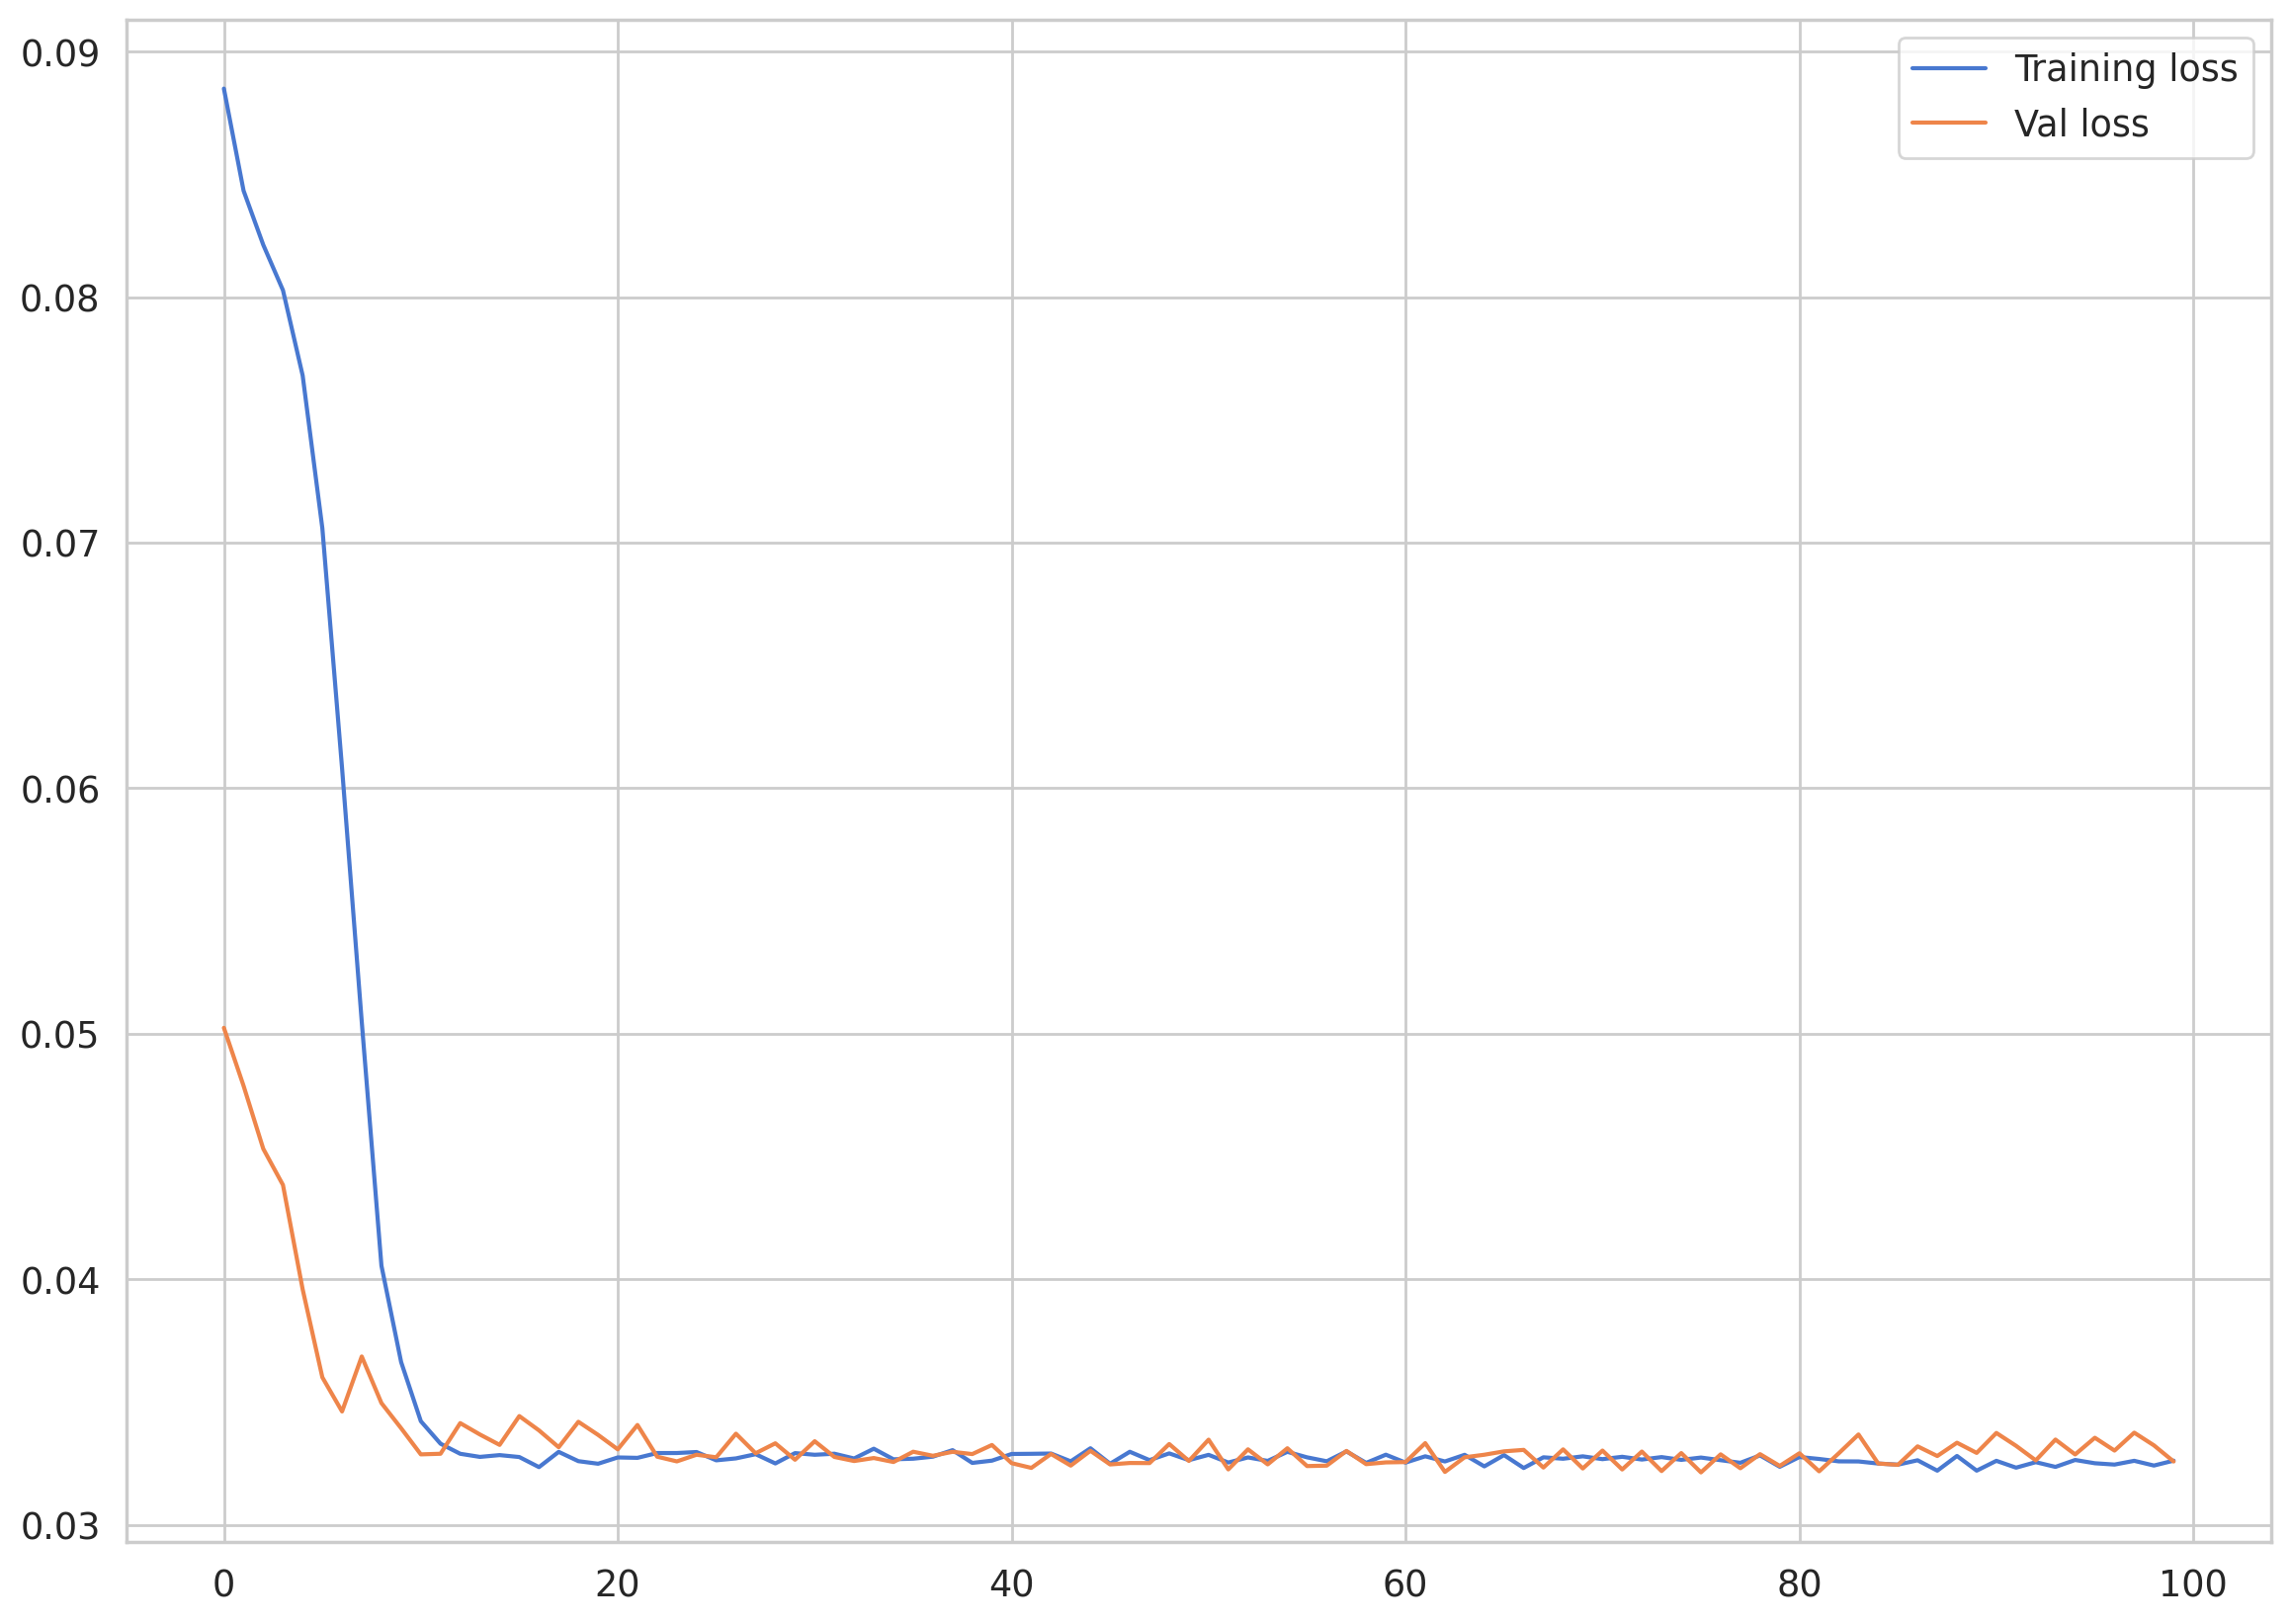

In [93]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

##4.3 Prediction

  In chapter 4.5, we will make a prediction about new input data using the model we built. The built model predicts new COVID-19 cases using the data range $t-5$ to $t-1$. Similarly, if new observed data in a range of $t-5$ to $t-1$ were input, it would be possible to predict COVID-19 cases in time $t$. We call this a `One-Step` prediction. This is a method to predict only one step ahead based on previous data.

On the other hand, a `Multi-Step` prediction predicts several steps ahead based on previous data. A `Multi-Step` prediction can be achieved with two methods: one is to exploit the `One-Step` model we built earlier, and the other is to utilize a <code>seq2seq</code> model architecture.

The first method is to predict value at $t+1$ using the predicted value at time $t$ from the `One-Step` prediction model, which is annotated as $\hat{t}$. This is achieved by predicting value at time $t+1$ using values of $t-4$, $t-3$, $t-2$, $t-1$, and $\hat{t}$. With this method, it is possible to predict values using previously predicted values as a model input, but this causes a loss in prediction performance in the long run due to the cumulative error of predicted values.

The other method is to perform a prediction using `seq2seq` model architecture. This method predicts future values by setting the length of the `decoder` same as the length of the future period we want to predict. There is the advantage of being able to use additional information through a `decoder` network when calculating prediction values, but the length of the future period must be fixed.

In this chapter, we will examine a `Multi-Step` prediction through code, which iteratively uses a `One-Step` prediction model. 

###4.3.1 One step Prediction

Firstly, we will view the performance of the model we built earlier by performing a `One-Step` prediction. We will predict on the test dataset we built. Whenever new sequence values are input for a prediction, we need to reset `hidden_state` to avoid reflecting the previous `hidden_state` calculated from the previous sequence. Using the `torch.unsqueeze` function, we need to extend the dimensions of the input data to a three-dimensional shape that the model expects. In addition, we will extract only the scalar value from the `y_test_pred` to be added to the <code>preds</code> list.

In [95]:
pred_dataset = X_test

with torch.no_grad():
    preds = []
    for _ in range(len(pred_dataset)):
        model.reset_hidden_state()
        y_test_pred = model(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)

We will compare the predicted values that the model predicted to the true values. True values are saved in `y_test`, where the data has already been through data scaling. We will utilize the formula below in order to transform the values back into the original scale. The formula below was tweaked based on the formula used for MinMax scaling before. 

> $x = x_{scaled} * (x_{max} - x_{min}) + x_{min}$

In the data, $x_{min}$ was 0. Therefore, all we need is to multiply $x_{max}$ to the scaled value to restore it into original scale. 

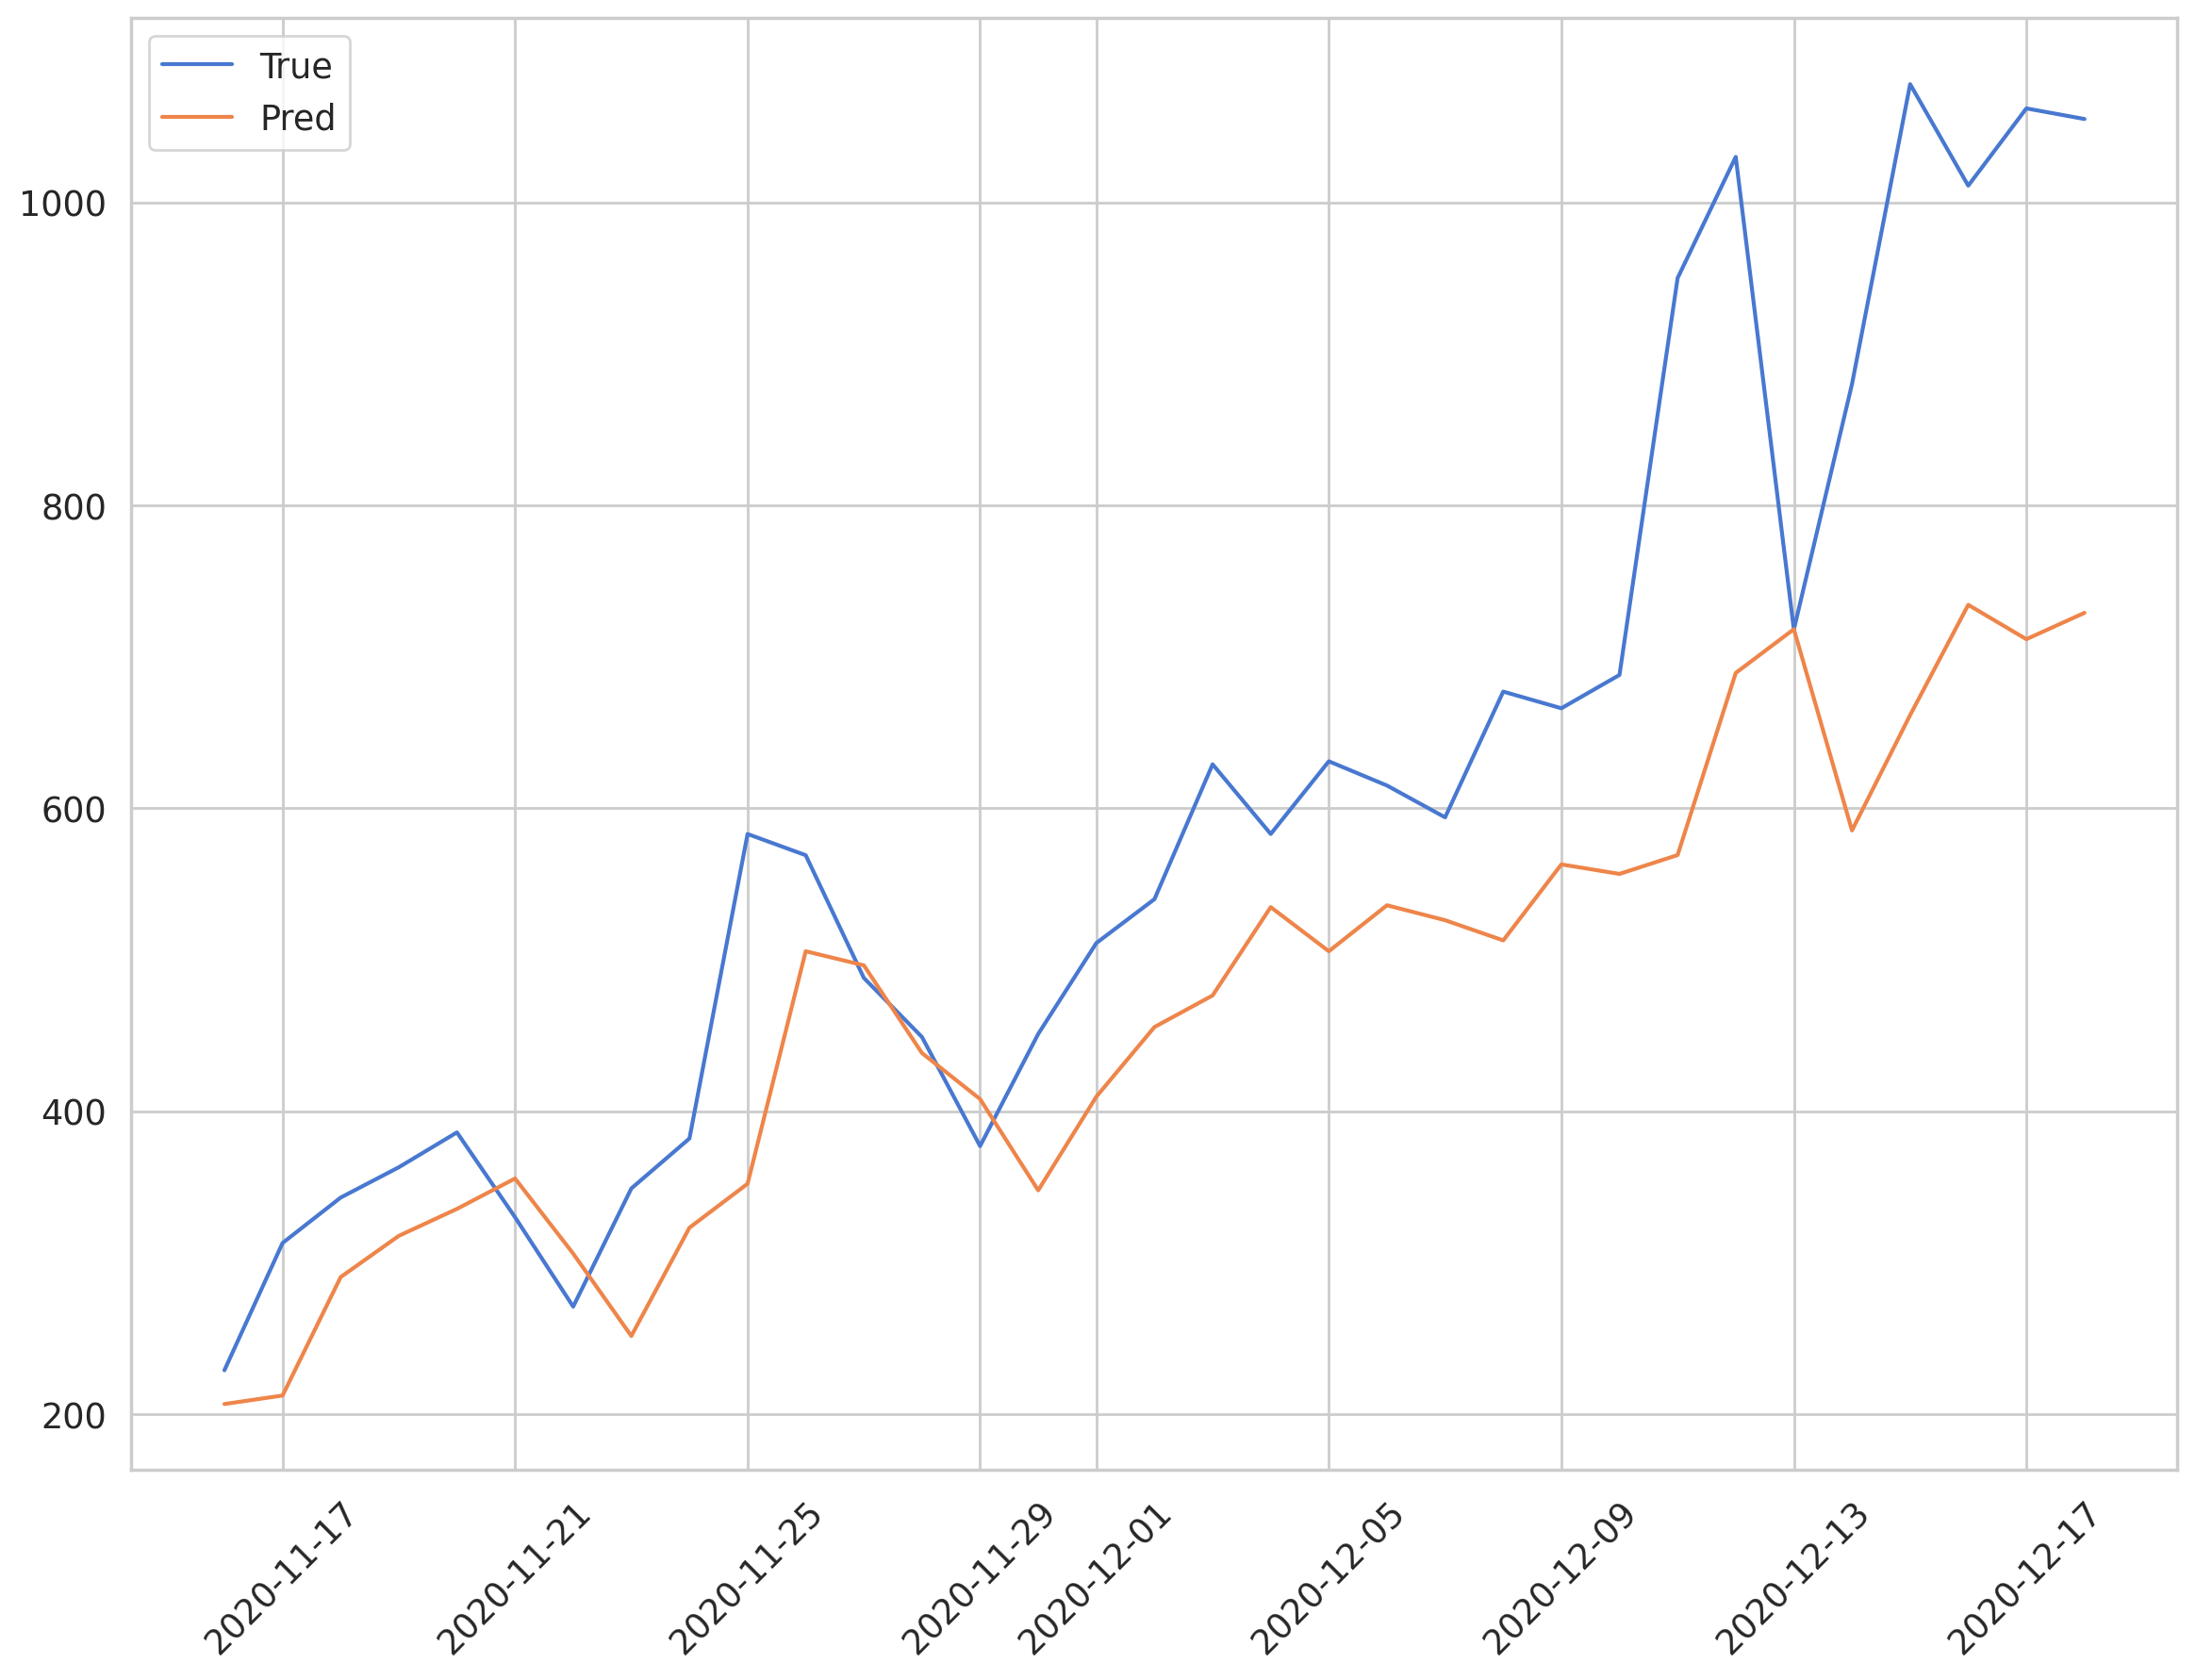

In [96]:
plt.plot(daily_cases.index[-len(y_test):], np.array(y_test) * MAX, label='True')
plt.plot(daily_cases.index[-len(preds):], np.array(preds) * MAX, label='Pred')
plt.xticks(rotation=45)
plt.legend()

The blue line shows the true values, and the orange line reveals the predicted values. Although the model predicts the rising trend of new COVID-19 cases, it does not predict the sharp rise in cases towards the middle of December.

We will calculate the MAE in order to find the mean absolute error of the predicted values. 

In [97]:
def MAE(true, pred):
    return np.mean(np.abs(true-pred))

In [98]:
MAE(np.array(y_test)*MAX, np.array(preds)*MAX)

247.5063309364493

###4.3.2 Multiple Step Prediction

We will perform a `Multi-Step` prediction, iteratively using the `One-Step` prediction model. We will predict future values by including the predicted value generated through the first sample of the test data into the input sequence, and then repeating the predictions by including the new predicted values into the input sequence. 

In [99]:
with torch.no_grad():
    test_seq = X_test[:1] # The first test set, three-dimension.
    preds = []
    for _ in range(len(X_test)):
        model.reset_hidden_state()
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, [pred]) # Append in sequence. 
        new_seq = new_seq[1:] # Add additional values to make seq_length 5.
        test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

As mentioned above, as the prediction period gets longer, the accuracy of this method begins to wane. Let's visualize the comparison between the predicted and true values below.

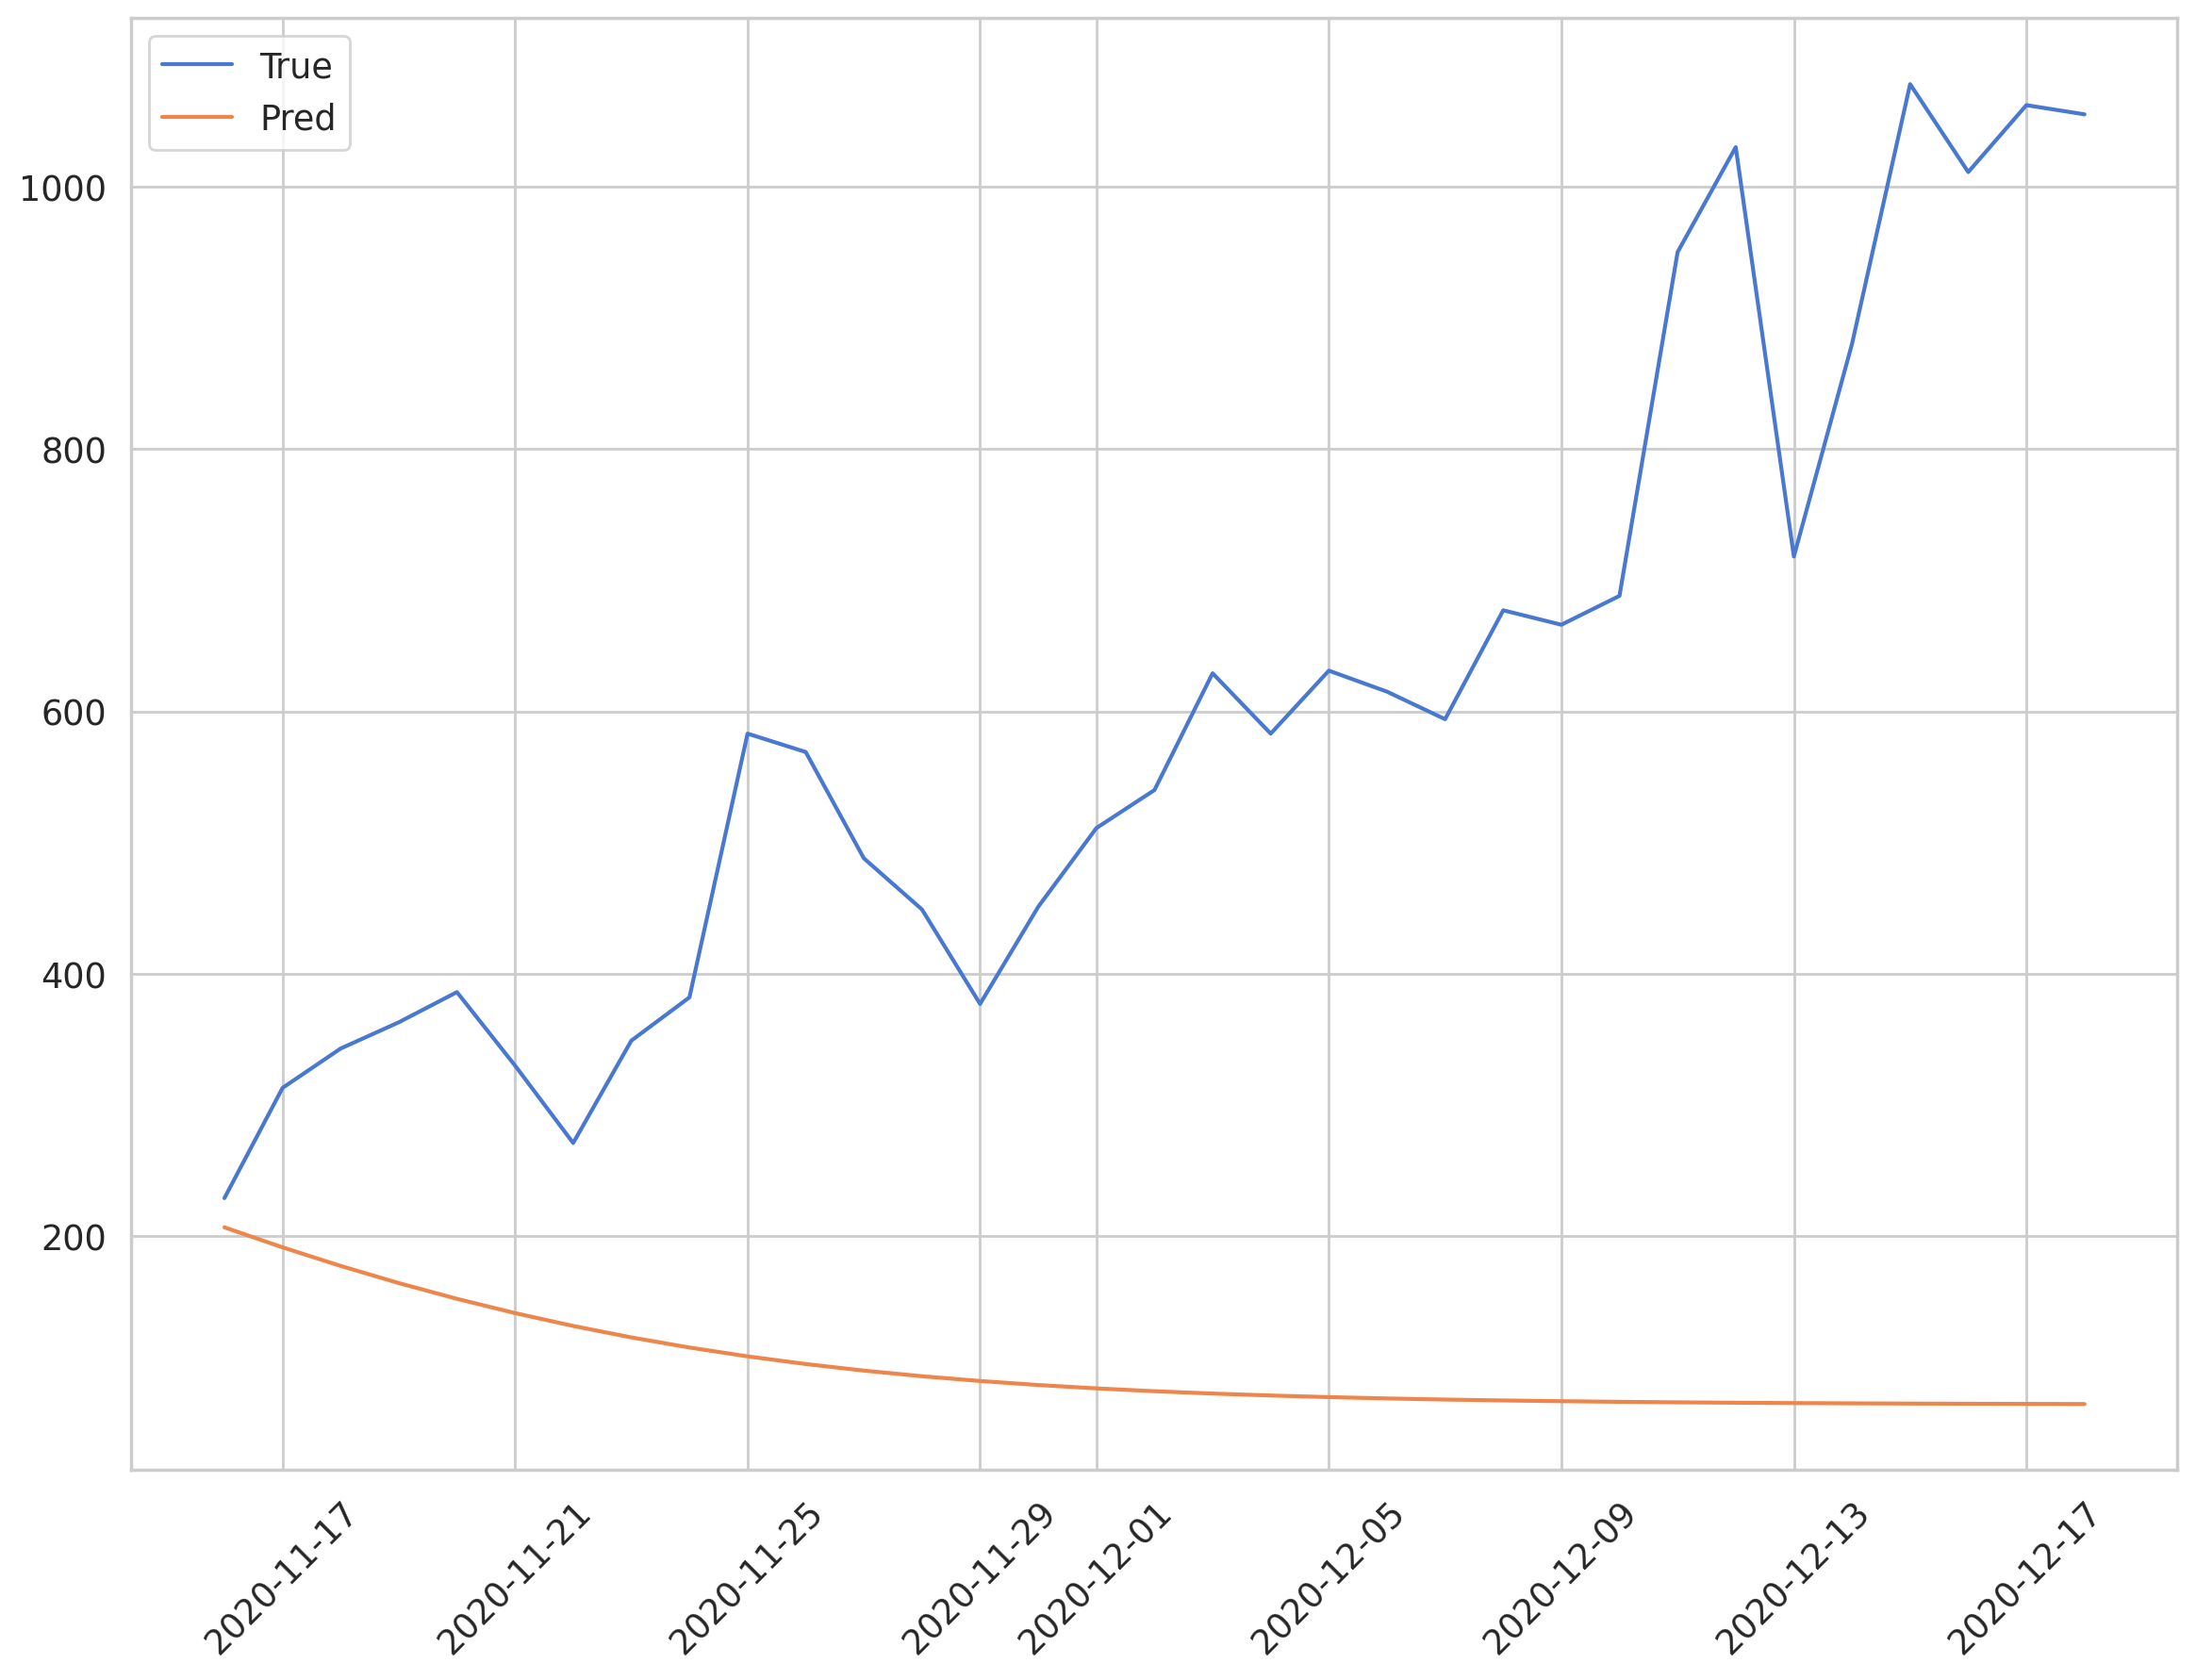

In [100]:
plt.plot(daily_cases.index[-len(y_test):], np.array(y_test) * MAX, label='True')
plt.plot(daily_cases.index[-len(preds):], np.array(preds) * MAX, label='Pred')
plt.xticks(rotation=45)
plt.legend()

#5.CNN+LSTM

##5.1 Define CNN+ LSTM Model

### 5.1.1 1D CNN (1 Dimensional Convolution Neural Network) / Conv1D

In chapter 4, we predicted COVID-19 cases using the LSTM model. In this chapter, we will predict COVID-19 cases by adding a CNN layer to the LSTM model.

CNN models can process 1D, 2D, or 3D inputs. In general, CNNs assume inputs are 2D unless we specify otherwise.

<br>

![그림 5-1](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/TS-ch5img01.png?raw=true)


### 5.1.2 Test with 1D CNN

![그림 5-2](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/TS-ch5img02.png?raw=true) ![그림 5-3](https://github.com/Pseudo-Lab/Tutorial-Book/blob/master/book/pics/TS-ch5img03.png?raw=true)

- Figures 5-2 &amp; 5-3 1D CNN Visualization

Figures 5-2 and 5-3 are the visualizations of 1D CNN architectures. Between Figure 5-2 and Figure 5-3, you can see the kernel moves one step when `stride` is 1. Now we will examine a 1D CNN through simple code.

Firstly, define and save a 1D CNN layer in `c`. Like in Figures 5-2 and 5-3, we will set `in_channels`=1, `out_channels`=1, `kernel_size`=2, and `stride`=1. After that, define the `input` variables, then apply them into `c` to calculate the predicted values.


In [101]:
c = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=2, stride=1)
input = torch.Tensor([[[1,2,3,4,5]]])
output = c(input)
output

tensor([[[1.8562, 2.7811, 3.7060, 4.6309]]], grad_fn=<ConvolutionBackward0>)

The 5 input examples generated 4 output values after passing through the 1D CNN with `kernel_size`=2. Next, we will find how the output values were generated. Let's view the values of weight and bias saved in `c`, first.

In [102]:
for param in c.parameters():
    print(param)

Parameter containing:
tensor([[[0.3874, 0.5375]]], requires_grad=True)
Parameter containing:
tensor([0.3938], requires_grad=True)


The first values are the weights. The `kernel_size` is 2, so there are two values for weight. The next value is the bias value. In each 1D CNN layer, there is one bias value. We will save each value under `w1`, `w2`, and `b` respectively.

In [103]:
w_list = []
for param in c.parameters():
    w_list.append(param)

w = w_list[0]
b = w_list[1]

w1 = w[0][0][0]
w2 = w[0][0][1]

print(w1)
print(w2)
print(b)

tensor(0.3874, grad_fn=<SelectBackward0>)
tensor(0.5375, grad_fn=<SelectBackward0>)
Parameter containing:
tensor([0.3938], requires_grad=True)


Through indexing, we saved the weight values under `w1`, `w2`, and `b`. Applying the math formula in Figures 5-2 and 5-3 used for the calculation of $y1$ and $y2$, we can calculate the `output` of the 1D CNN. The calculated output, when the 1D CNN filter passes 3 and 4, is shown in the following: 

In [104]:
w1 * 3 + w2 * 4 + b

tensor([3.7060], grad_fn=<AddBackward0>)

This result is the same as the third value of the output. The rest of the values are calculated in this way.

In [105]:
output

tensor([[[1.8562, 2.7811, 3.7060, 4.6309]]], grad_fn=<ConvolutionBackward0>)

## 5.2 Build the CNN-LSTM Model
We will build the CNN-LSTM model now. The biggest difference from the LSTM model we built in chapter 4 is that we are adding the 1D CNN layer in this model. When viewing the code below, we can see that the 1D CNN layer was added to `CovidPredictor` through `nn.Conv1d`.

In [106]:
class CovidPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers):
        super(CovidPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers
        self.c1 = nn.Conv1d(in_channels=1, out_channels=1, kernel_size = 2, stride = 1) # Add a 1D CNN layer
        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers
        )
        self.linear = nn.Linear(in_features=n_hidden, out_features=1)
    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len-1, self.n_hidden)
        )
    def forward(self, sequences):
        sequences = self.c1(sequences.view(len(sequences), 1, -1))
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len-1, -1),
            self.hidden
        )
        last_time_step = lstm_out.view(self.seq_len-1, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

## 5.3 Train the CNN-LSTM Model
We will train the CNN-LSTM model using the `Adam` function we already built in chapter 4. We set `Adam` as the optimizer, with a learning rate of `0.001` and the loss function as `MAE (Mean Absolute Error)`.




In [107]:
def train_model(model, train_data, train_labels, val_data=None, val_labels=None, num_epochs=100, verbose = 10, patience = 10):
    loss_fn = torch.nn.L1Loss() #
    optimiser = torch.optim.Adam(model.parameters(), lr=0.001)
    train_hist = []
    val_hist = []
    for t in range(num_epochs):

        epoch_loss = 0

        for idx, seq in enumerate(train_data): # hidden state needs to be reset after every sample

            model.reset_hidden_state()

            # train loss
            seq = torch.unsqueeze(seq, 0)
            y_pred = model(seq)
            loss = loss_fn(y_pred[0].float(), train_labels[idx]) # calculated loss after 1 step

            # update weights
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()

            epoch_loss += loss.item()

        train_hist.append(epoch_loss / len(train_data))

        if val_data is not None:

            with torch.no_grad():

                val_loss = 0

                for val_idx, val_seq in enumerate(val_data):

                    model.reset_hidden_state() # hidden state reset every sequence

                    val_seq = torch.unsqueeze(val_seq, 0)
                    y_val_pred = model(val_seq)
                    val_step_loss = loss_fn(y_val_pred[0].float(), val_labels[val_idx])

                    val_loss += val_step_loss
                
            val_hist.append(val_loss / len(val_data)) # append in val hist

            ## print loss for every `verbose` times
            if t % verbose == 0:
                print(f'Epoch {t} train loss: {epoch_loss / len(train_data)} val loss: {val_loss / len(val_data)}')

            ## check early stopping for every `patience` times
            if (t % patience == 0) & (t != 0):
                
                ## if loss increased, perform early stopping
                if val_hist[t - patience] < val_hist[t] :

                    print('\n Early Stopping')

                    break

        elif t % verbose == 0:
            print(f'Epoch {t} train loss: {epoch_loss / len(train_data)}')

            
    return model, train_hist, val_hist

In [108]:
model = CovidPredictor(
    n_features=1,
    n_hidden=4,
    seq_len=seq_length,
    n_layers=1
)

Let's briefly view the predicted model.

In [109]:
print(model)

CovidPredictor(
  (c1): Conv1d(1, 1, kernel_size=(2,), stride=(1,))
  (lstm): LSTM(1, 4)
  (linear): Linear(in_features=4, out_features=1, bias=True)
)


Let's train the model.

In [111]:
model, train_hist, val_hist = train_model(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    num_epochs=100,
    verbose=10,
    patience=50
)

Epoch 0 train loss: 0.08508923968435818 val loss: 0.04692671075463295
Epoch 10 train loss: 0.03536883176846779 val loss: 0.035416074097156525
Epoch 20 train loss: 0.03377105925906578 val loss: 0.03366333246231079
Epoch 30 train loss: 0.03316870799744894 val loss: 0.03344683721661568
Epoch 40 train loss: 0.033261189181928545 val loss: 0.035815391689538956
Epoch 50 train loss: 0.032731885478521384 val loss: 0.033772993832826614
Epoch 60 train loss: 0.032866679691313495 val loss: 0.03411169350147247
Epoch 70 train loss: 0.032736534369624155 val loss: 0.03544527292251587
Epoch 80 train loss: 0.03254991278348498 val loss: 0.03565341234207153
Epoch 90 train loss: 0.03245104501252259 val loss: 0.03592802584171295


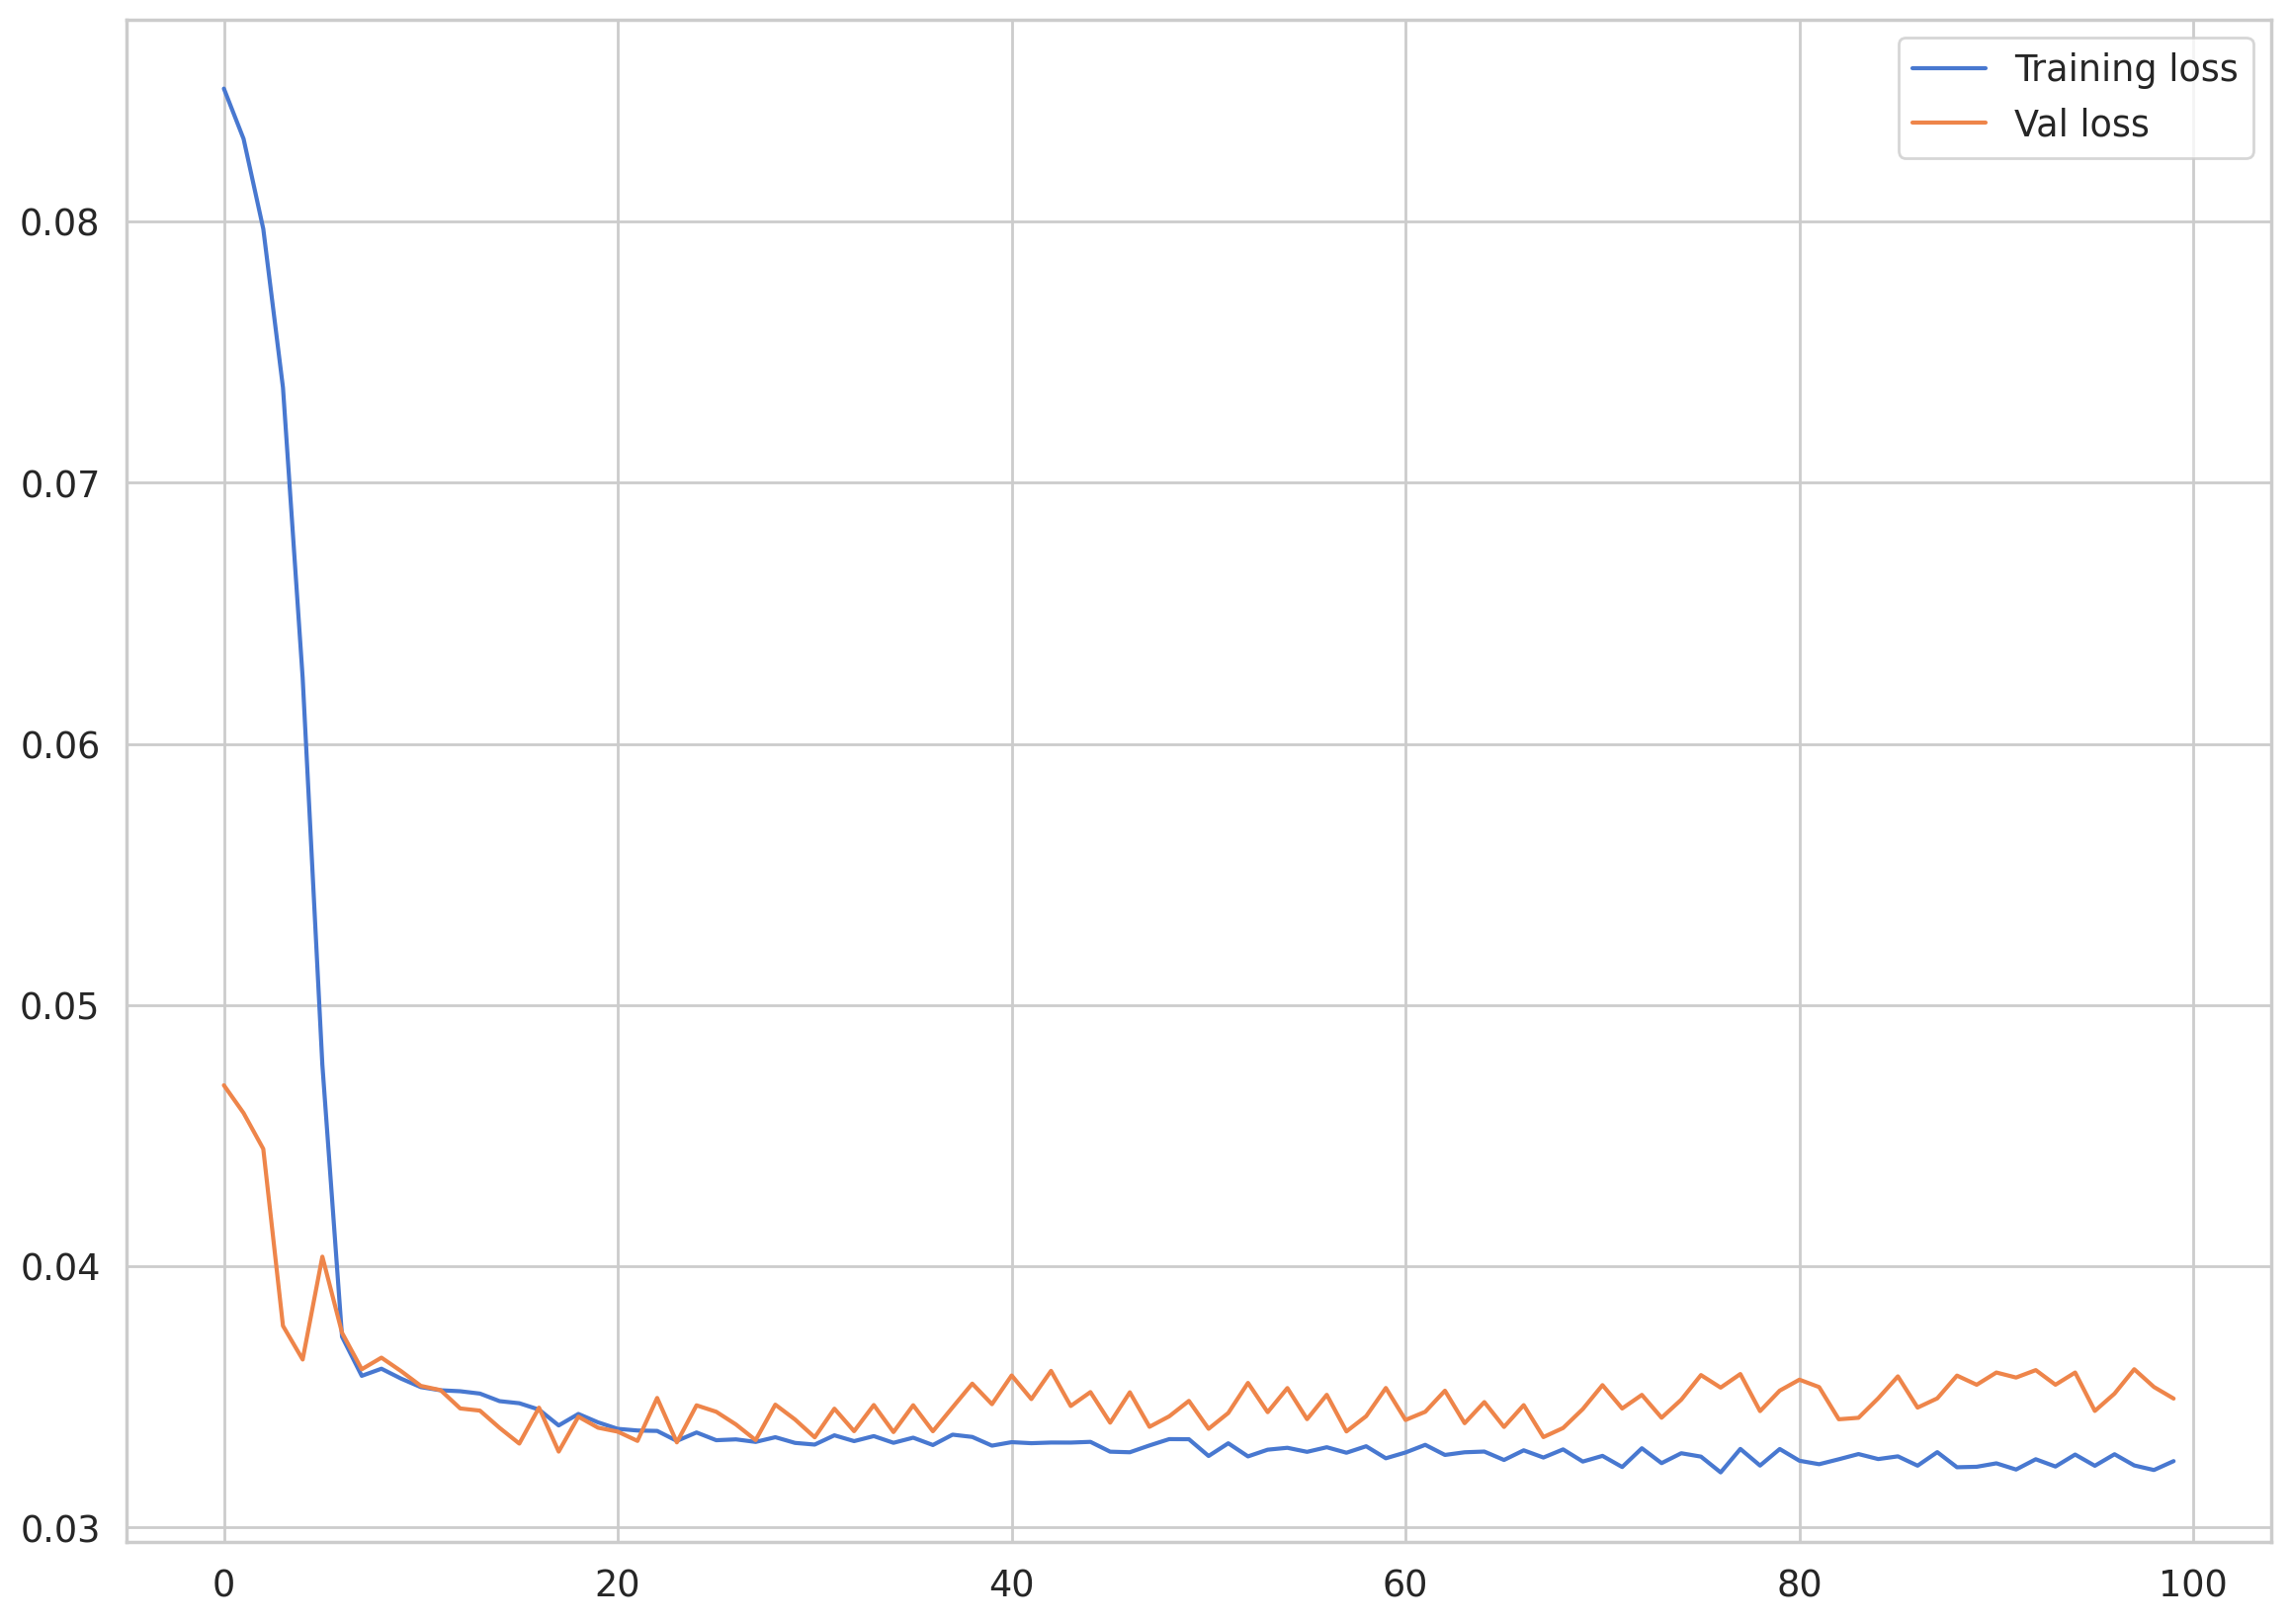

In [112]:
plt.plot(train_hist, label="Training loss")
plt.plot(val_hist, label="Val loss")
plt.legend()

## 5.4 Predict Confirmed Cases

Since we are done training the CNN-LSTM model, we will predict confirmed COVID-19 cases using the trained model. When performing the prediction, `hidden_state` needs to be reset in order for the previous sequence not to influence the next step. Let's convert the input data into three dimensional shape that the model expects by using the `torch.unsqueeze` function. After that, we should extract only the scalar value from the predicted data, and then add them to the `preds` list.

In [113]:
pred_dataset = X_test

with torch.no_grad():
    preds = []
    for _ in range(len(pred_dataset)):
        model.reset_hidden_state()
        y_test_pred = model(torch.unsqueeze(pred_dataset[_], 0))
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)

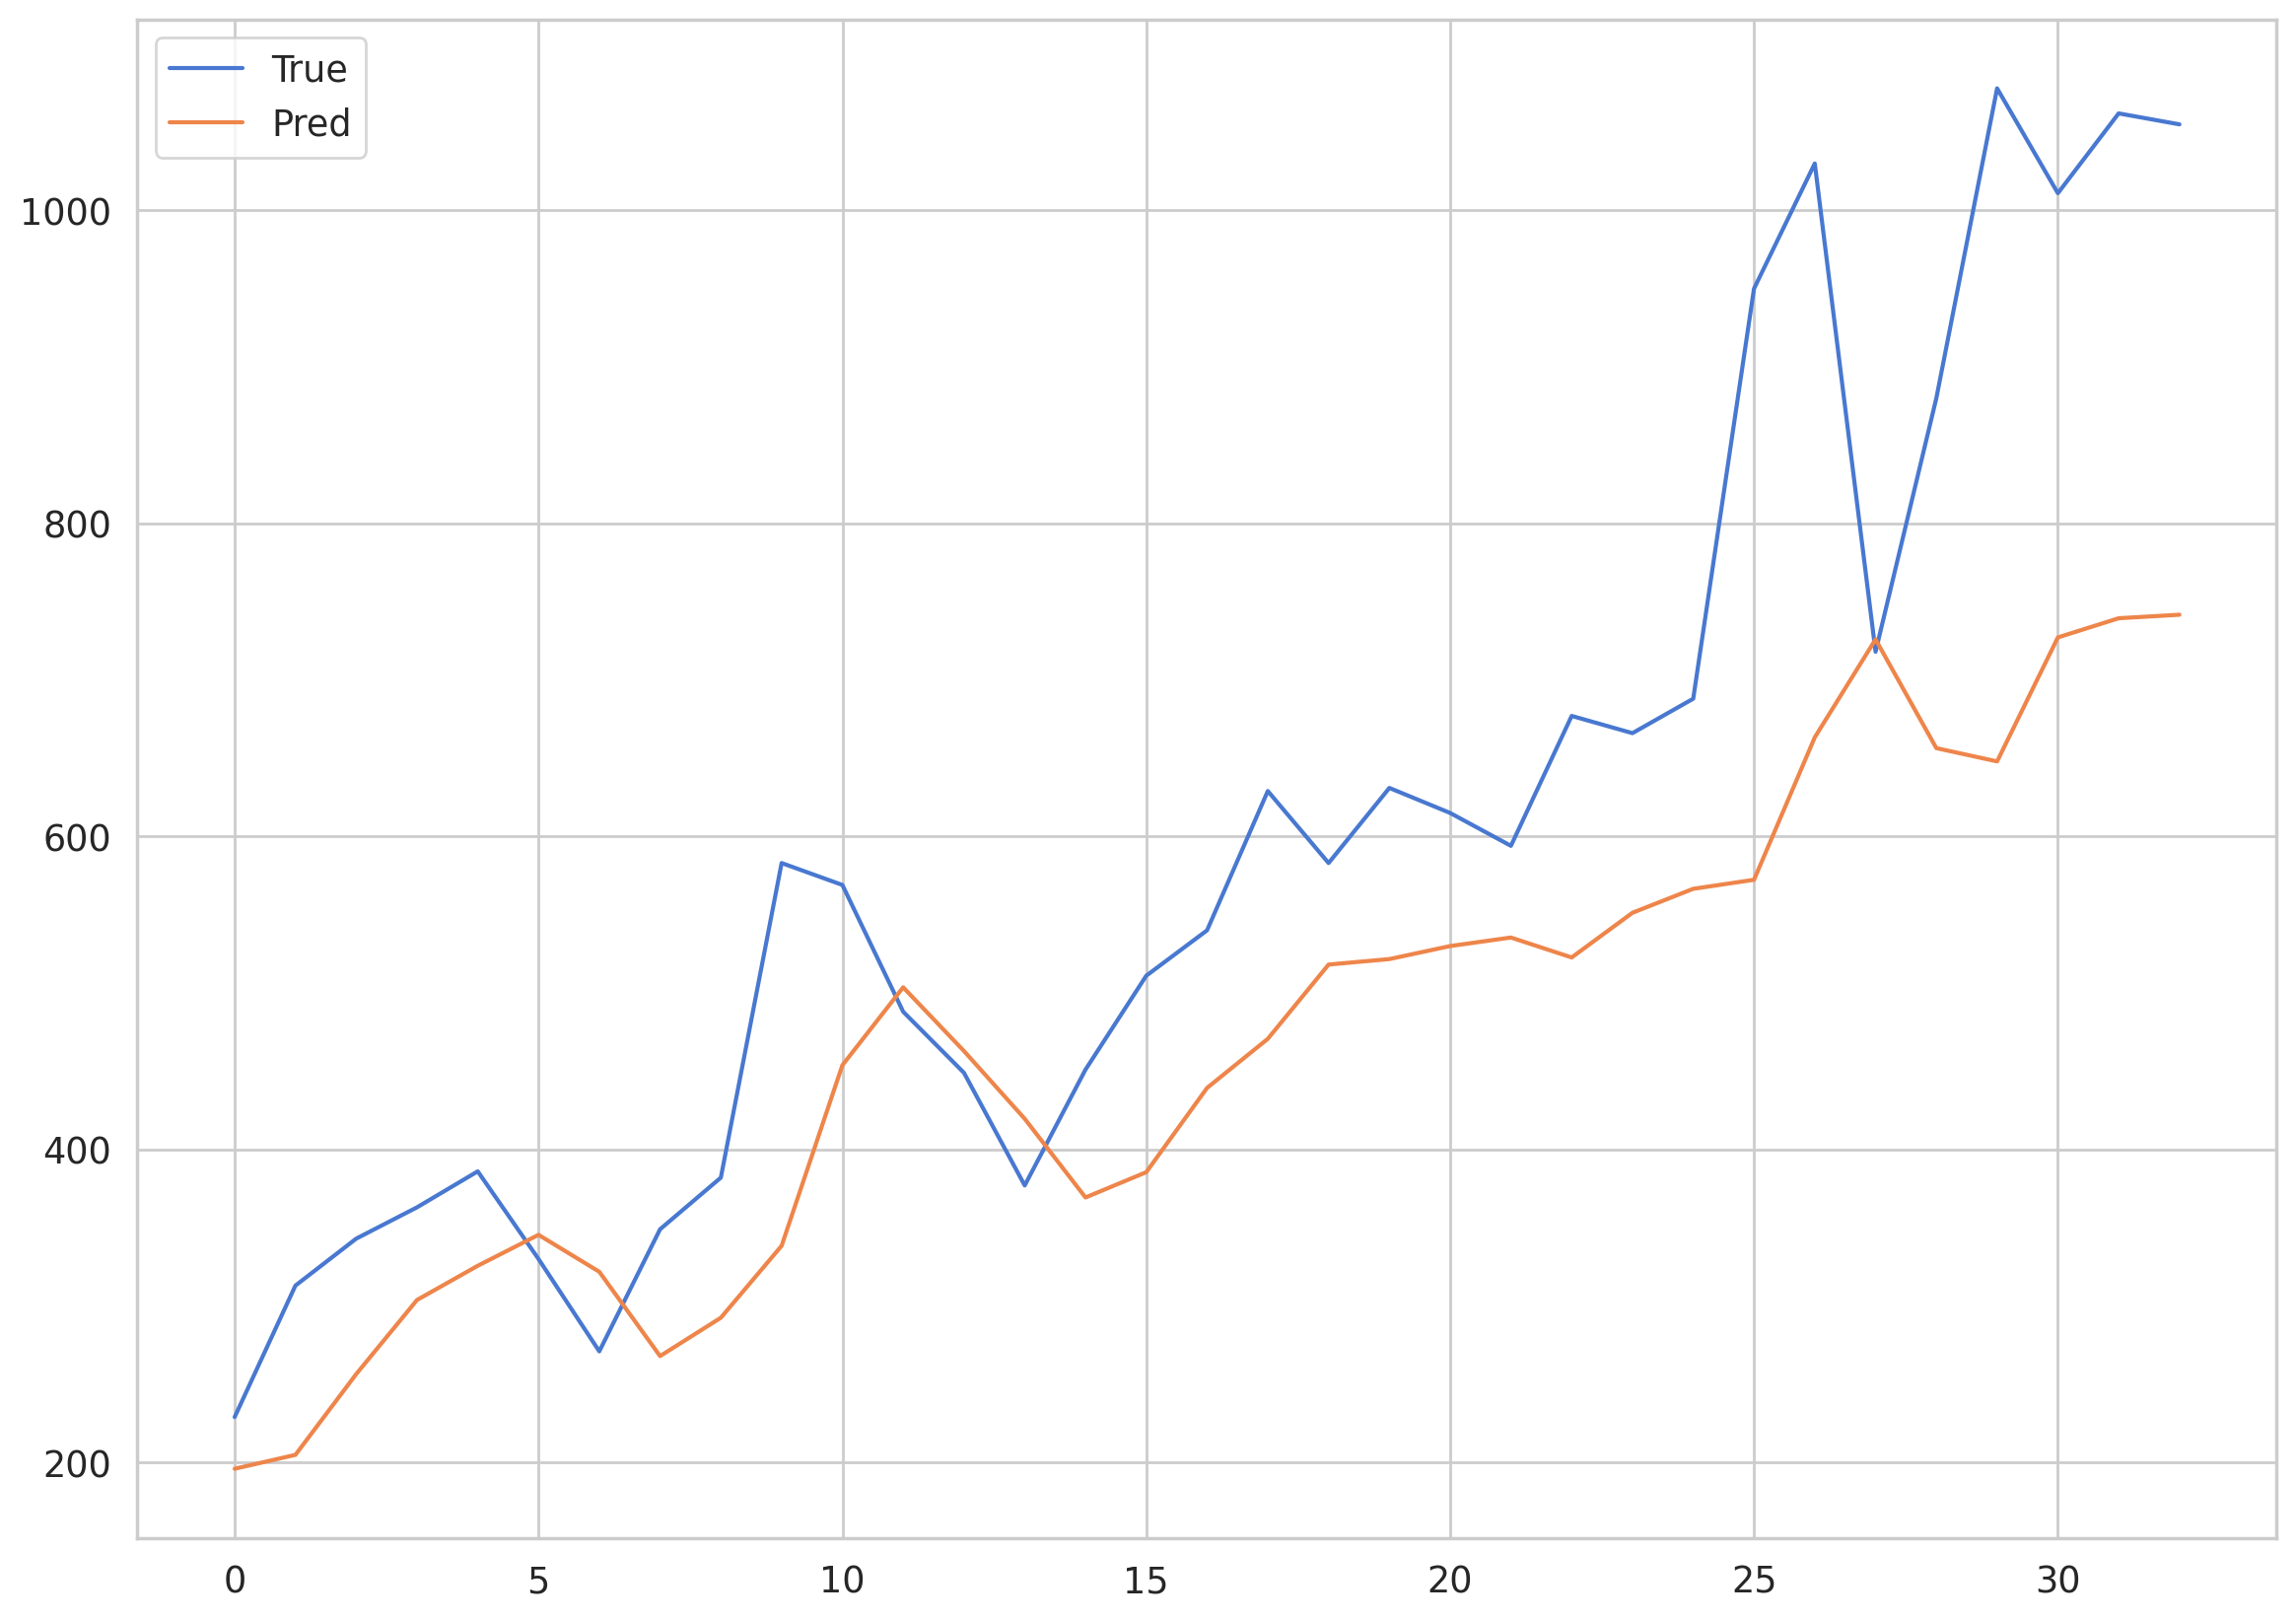

In [114]:
plt.plot(np.array(y_test)*MAX, label = 'True')
plt.plot(np.array(preds)*MAX, label = 'Pred')
plt.legend()

In [115]:
def MAE(true, pred):
    return np.mean(np.abs(true-pred))

In [116]:
MAE(np.array(y_test)*MAX, np.array(preds)*MAX)

250.73328587055698